<a href="https://colab.research.google.com/github/s-ryuri/TIL/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B56%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import warnings
#ignore warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic') 
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

font family:  ['Noto Sans KR']


# SVM Regression 

svm은 linear와 nonlinear regression을 지원합니다.
SVM regression은 trick이 사용되는데 classification과는 다른 방식입니다.
classification에서는 margin viloation을 제한하면서 두 클래스 사이를 최대한 크게 만드는 만면 regression은 두 클래스 사이의 street안에 최대한 많은 instance를 집어 넣습니다. 
street의 width는 hyperparameter로 controll합니다.

In [20]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

SVM에 사용할 데이터를 만들어줍니다.

In [21]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

street의 width를 제한하는 앱실론을 1.5로 설정하고 svm_reg 모델을 만들고 fti을 시킵니다.

In [22]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

엡실론에 따른 street의 변환를 보기 위해서 모델을 2개 만들어줍니다.

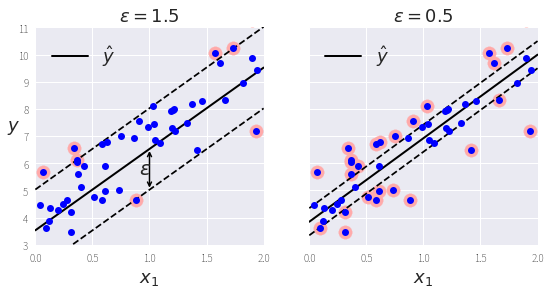

In [23]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

위의 그림에서 보다 싶이 엡실론이 크면 width또한 커집니다. margin안에 최대한 많은 instance를 넣습니다. 또한 margin안에 training instances를 넣어도 model의 prediction에 영향을 주지 않습니다. 영향을 받게 하려면 margin 바깥으로 넣어야됩니다. 분홍색으로 색깔 칠해진 데이터를 support vector

SVM으로 nonlinear regression을 다룰려면 kernelized SVM model을 사용해서 할 수 있습니다.

In [24]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

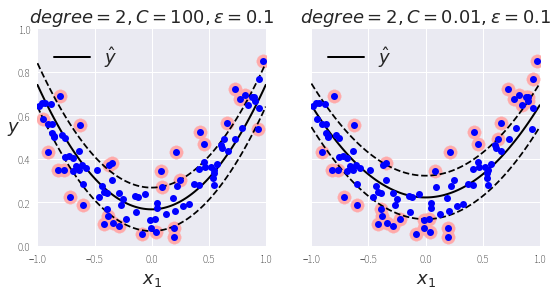

In [25]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

# Under the Hood

SVM classifier의 Decision Function의 식에서 result가 positive이면 예측된 y hat은 1입니다. 그렇지 않으면 0 class 입니다.

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

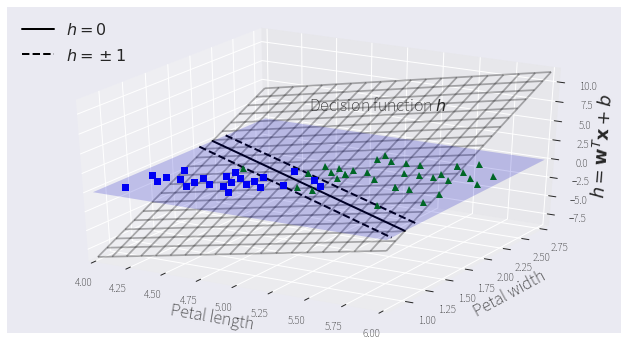

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

위의 그래프에서 굵은 선이 decision boundary입니다. 즉 두 평면의 교선입니다. 
dotted 선은 margin입니다. decision function이 1 or -1인 부분입니다. 이 둘은 같은 간격이며 평행합니다. linear SVM을 학습 시킨다는 건 margin violation을 피하거나 또는 제한하면서 가능한 최대한의 margin을 만드는 w와 b를 찾는 것 입니다.

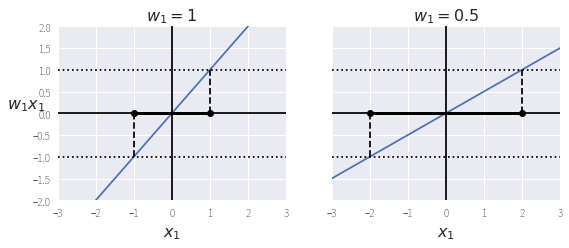

In [29]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w
    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

위의 그래프에서 볼 수 있듯이 w가 작을수록 margin이 커집니다. 그렇기에 최대 margin을 얻기 위해서 최소한의 w를 얻기를 원합니다.

많일 어떠한 violations도 원하지 않는다면(hard margin), 모든 positive training **instance**에 대해서 1보다 크게 decision function을 만들어주고 모든 negative training instances를 -1 보다 작게 만듭니다.

soft margin objective를 얻기 위해서는 slack variable인 타우를 각각의 인스턴스일 적용합니다. 타우는 각각의 인스턴스들이 margin을 침해할 수 있을지를 측정합니다.

여기서는 2가지의 충돌이 발생합니다.
마진 violation을 줄이기 위해서 slack variable를 최대한 줄이기와
1/2 WTW를 가능한 작게 줄이면 마진이 커집니다. 결국 trade off 입니다 .

C 하이퍼 파라미터는 두 개의 오브젝트의 trade off를 결정합니다.

# Quandratic Programming

하드 마진과 소프트 마진 문제는 convex Quadratic optimization 문제입니다.
이 문제는 QP 문제로 잘 알려져있습니다.

# Dual Problem

constrained optimization problem, primal problem이 주어졌을 때 다른 방식으로 표현하되 굉장히 가까운 문제로 풀 수 있습니다. 즉 dual problem입니다.

몇 몇의 조건에서 dual problem은 primal problem과 같은 솔루션을 낼 수 있습니다.

조건이란건 objectivce function은 convex여야되고, inequality constranints continuously differentiable, conver functinoin이여야합니다.

운 좋게 luckily, SVM problem은 몇 가지 조건을 만족시키고 그렇기에 primal problem 또는 dual problem을 선택해서 풀 수 있습니다. 둘 다 똑같은 same solution을 가집니다.

# Hinge Loss
max(0,1-t)를 hinge loss function입니다.


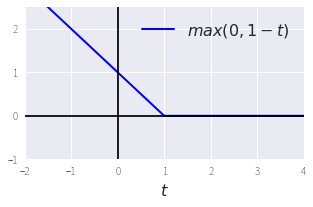

In [30]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

# Decision Tree

Decision Tree는 classification과 regression, multioutput tasks에 잘 작동합니다.
RandomForests의 fundamental components입니다.

Decision Tree는 graphviz를 이용해서 그릴 수 있습니다.

In [31]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

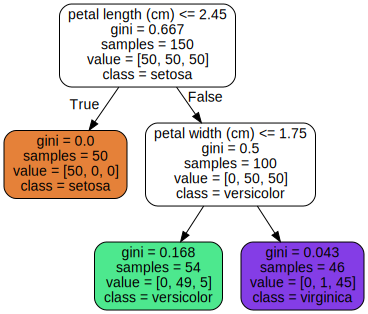

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

이렇게 그림을 그릴 수 있기에 해석이 굉장히 용이 합니다.<br>
딥러닝과 같은 블랙박스 모델과 다르게 트리는 시각화가 가능합니다.
먼저 첫 번째 노드의 나누는 기준은 petal length를 2.45로 기준으로 잡습니다. 작으면 True로 아니면 false로 갑니다. true인 경우 자식 노드가 없기에 리프 노드가 됩니다. false로 가게 되면 2.45보다 큰 경우 입니다. 이제 여기서 petal width <= 1.75를 기준으로 잡습니다. true이면 class가 versicolor가 되고 false이면 class = virginica가 됩니다.

여기서 samples은 얼마나 많은 training instance가 있는지를 보여줍니다. petal length가 2.45보다 큰 경우는 smales가 100인데 총 100개가 있따는 뜻입니다. values는 samples에서 각각의 class가 몇 개 인지를 보여줍니다. values가 [0,50,50]인데 class 1 0개 class 2 50개 class 3 50개라는 걸 뜻합니다.

gini 계수는 불순정도를 측정합니다. 노드가 pure 하다는건 gini = 0이라는 걸 의미합니다 즉 모든 instances가 같은 클래스에 있다는 걸 뜻합니다.
예를 들어 class = setosa에는 gini = 0.0이고 values를 보면[50,0,0]으로 versicolor만 50개가 있습니다.

gini 계수는 전체 세트에서 k번째 인스턴스가 속한 확률을 다 더해서 1에서 빼줍니다.

entropy는 열역학에서 사용되는 개념입니다. 분자의 무질서를 측정합니다. 분자가 잘 정돈 되어 있으면 entropy는 0에 가까워집니다.

ML에서는 데이터가 균일하면 entropy가 0에 가까워집니다.

entropy는 데이터가 전체 데이터셋의 속할 확률을 log값에 씌워서 계산합니다.

Gini 계수나 entropy는 거의 차이가 없기에 원하는 걸 쓰면 됩니다.





Saving figure decision_tree_decision_boundaries_plot


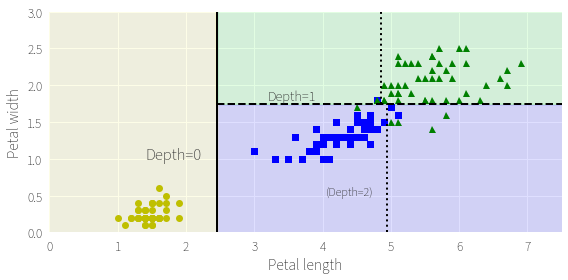

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

depth 0으로 된 라인은 root 노드의 decision boundary입니다. 즉 petal length = 2.45인 부분입니다. depth = 0인 부분의 왼쪽은 iris setosa만 있기에 pure node입니다.
depth0을 기준으로 오른쪽은 데이터가 균일 하지 못하기에 impure 합니다. 그래서 petal width 1.75를 기준으로 다시 나눠줍니다. 여기서 max_depth가 2이기에 여기서 멈춥니다. 만일 max_depth가 3이면 점선이 더 추가 됩니다.

decision tree는 intutive 합니다. white box 모델 그렇기에 해석이 용이합니다.
RandomForest나 neural networks는 black box 모델입니다. 블랙 박스모델들은 좋은 예측을 만들지만 왜 이런 결과를 내놓는지에 대해서 설명하기가 어렵습니다.

decision Tree는 각 인스턴스가 클래스에 속할 확률을 계산할 수 있습니다.
depth = 2의 left node를 보면 0 49, 5 이기에 0/54 % 49 / 54 % 5/54 %로 계산할 수 있습니다.

# CART 알고리즘

scikit-learn에서는 Decison Trees를 학습하기 위해서 CART 알고리즘을 사용합니다.(Classification and Regression Tree)

CART 알고리즘은 이진트리 형태입니다. 리프 노드가 아닌 노드는 항상 두 개의 자식 노드를 가지고 있습니다. (yes/no answers 입니다).
ID3 같은 알고리즘은 두 개 이상의 자식 노드를 가질 수 있습니다.

CART 알고리즘은 첫 번째로 single feature k와 threshold를 이용해서 training set을 두 개의 subsets으로 나눕니다.

single feature threshold는 purest subsets를 만드는 쌍을 고릅니다.

CART 알고리즘은 트레이닝 셋을 2개로 나눈 뒤에 또 subset을 같은 논리도 2개로 나눕니다. 이걸 재귀적으로 반복합니다.

# Greedy

CART 알고리즘ㅁ은 Greedy 알고리즘입니다.
이건 그리디하게 top level을 나눌 수 있는 걸 찾고 sub 레벨에서도 그리디하게 나눕니다. 하지만 그리디하게 나누바도니 이게 정말로 최적의 해인지를 check 할 수는 없습니다. 

unfortunately 하게 optimal tree 를 찾는 건 NP 문제로 알려져 있습니다.




# Regularization HyperParameters

Decision Tree는 training data에 대해서 거의 가정을 하지않습니다.
예를 들어 linear model은 데이터가 선형이라고 가정을 하지만 trees는 가정하지 않습니다.

tree에서는 제약이 없다는 tree 구조는 training data에 구조를 맞추게 될것이기에 overfitting이 발생합니다. 이러한 모델을 nonparmetrice model이라고 부릅니다.
이건 파라미터가 없기 때문이 아니라 트레이닝 전에 파라미터의 수를 정할 수 없기에 nonparametric 이라고 불립니다. 그렇기에 model structure가 데이터에 굉장히 밀접해집니다.

parametric model (선형 모델과 같은) parameters의 수를 미리 결정할 수 있습니다. 그렇기에 자유도가 제한적이고 오버피팅의 위험을 줄일 수 있지만 과소적합이 발생할 수 있습니다.

Decision Tree의 overfitting을 줄이기 위해서는 training 동안 자유도를 제한할 수 잇습니다. 이런걸 regularization이라고 합니다. 적어도 maximum depth를 제한할 수 있습니다.

DecisionTreeClassifier는 Tree의 모양을 제한하는 다른 파라미터를가지고 있습니다.

## min_samples_split
이건 node가 나눠지기전에 최소한으로 가지고 있어야할 데이터 수를 의미합니다. 이 수를 만족시키지 못 하면 나눌 수 없습니다.

## min_samples_leaf

leaf 노드가 가지고 있어야할 최소한의 samples 수입니다. 이 수를 만족하면 leaf 노드가 됩니다.

## min_weight_fraction_leaf
min_samples_leaf와 같지만 weighted instances의 총 비율을 나타냅니다.

## max_leaf_nodes

leaf node의 총 갯수를 의미합니다.

min과 관련된 하이퍼 파라미터를 늘리고 max 관련된 하이퍼 파라미터를 줄이면 model을 regularize 할 수 있습니다.

Saving figure min_samples_leaf_plot


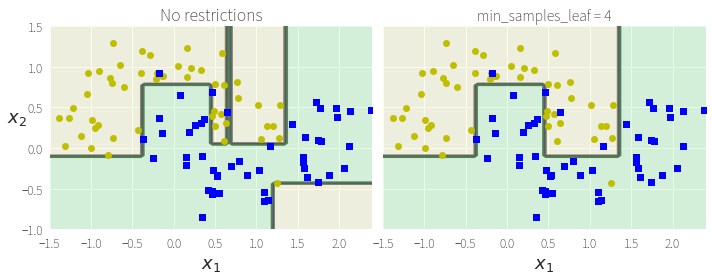

In [34]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

위의 그래프에서 왼쪽은 트리에 어떤 제한도 하지 않고 모델을 만든 경우 입니다. 훈련 데이터셋을 굉장히 자세하게 나누고 있기에 오버피팅입니다.

오른쪽 그래프는 매개변수로 제한을 걸어서 오버피팅을 방지 했습니다. 훈련 데이터에 대한 정확도는 떨어졋을지라도 일반화가 더 잘되었습니다.



# Regression

decision Tree는 regression도 할 수 있습니다.

In [35]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Saving figure tree_regression_plot


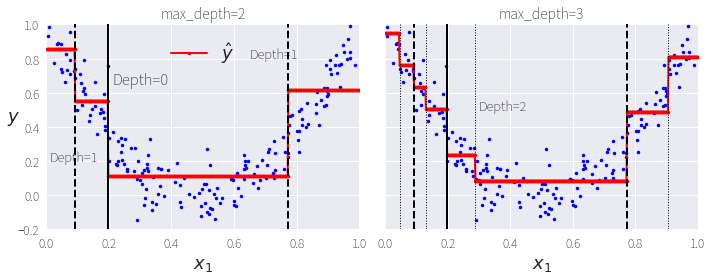

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

회귀는 그 지역에 속한 인스턴스의 평균으로 예측값을 구합니다. 알고리즘 자체는 훈련 인스턴스들이 예측 벨류가 가장 가깝게 예측할 수 있게 지역을 나눕니다.

In [38]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

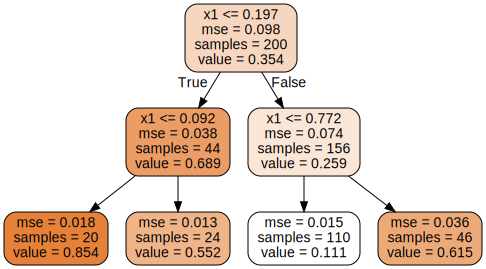

In [39]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

회귀는 분류와 매우 비슷한 트리 모양을 가지지만 분류는 각 클래스를 예측하지만 회귀는 리프 노드에서 value를 예측합니다. 즉 leaf node에 들어가면 value는 항상 그 값입니다. 예를들어 x1 - 0.6이면  value는 0.111이 됩니다. mse는 0.015가 되고 샘플은 110개입니다. 110개에서의 MSE가 0.015

Saving figure tree_regression_regularization_plot


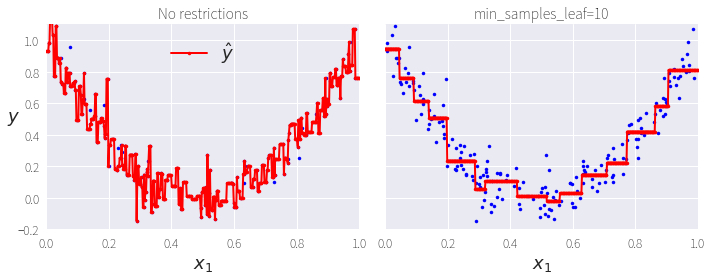

In [40]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

CART 알고리즘 또한 비슷하게 작동하지만 impurity를 최소화 하는 방향으로 훈련 데이터를 나누는게 아니라 MSE를 최소화하는 방법으로 트레이닝 세트를 나눕니다.

왼쪽은 제한을 걸지 않았을 때의 예측입니다. 굉장한 오버피팅을 보입니다.
min_samples_leaf = 10로 제한을 걸면 일반화가 잘된 모습을 보이고 있습니다.


# instability

Decision Trees는 모든 분할이 축에 수직인 직교 의사 결정 경계를 선호해서 훈련 세트의 회전에 민감합니다. 훈련 세트가 약간만 변화해도 결정 경계가 달라집니다.



Saving figure sensitivity_to_rotation_plot


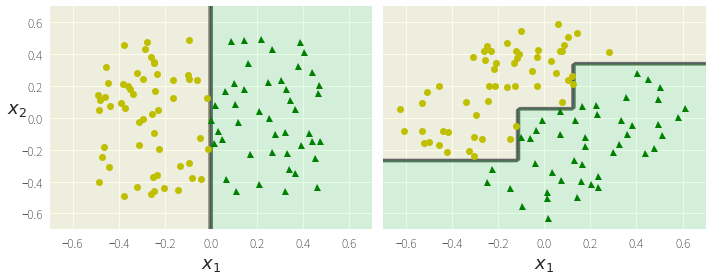

In [41]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

왼쪽 그래프는 Decision Tree는 한 줄로 쉽게 나눠집니다. 하지만 데이터 셋을 약간 45도를 회전했을 때의 모습입니다. 결정 경계가 불필요하게 복잡해 보입니다.

Saving figure decision_tree_instability_plot


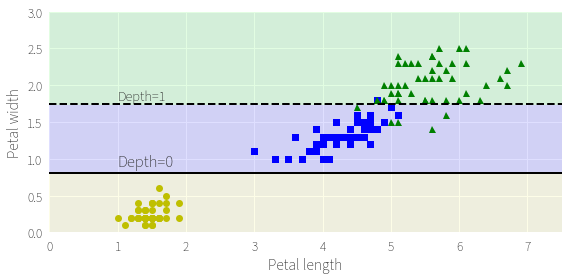

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

일반적으로 Decision Tree는 트레이닝 데이터의 약간의 variation에도 굉장히 민감합니다. 예를 들면 만일 iris training set에서의 넓은 범위 iris versicolor를 없애고 새로운 모델을 학습하면, 새로운 모델이 그려집니다.